# Curve module Example

The QuantForm library implements classes for various curves. The classes generally accept some set of points (or a way to calculate the set of points) as parameters and interpolates a full curve from them. 

In [1]:
# Setup for the notebook
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from quantform.pylib.curve import GenericCurve
GenericCurve

quantform.pylib.curve.GenericCurve.GenericCurve

## GenericCurve

The simplest curve implementation is the GenericCurve class. This class takes as parameter the 'x' and 'y' values and uses a CubicSpline interpolator to form a continuous curve. For example

In [2]:
def func(x):
  return np.exp(np.sin(x * np.pi))

x = np.linspace(1, 2, 10)
y = func(x)

curve = GenericCurve(x, y)

The interpolated points can be accessed by calling the curve object

In [3]:
print(f"Interpolated at x=1.22: {curve(1.22)}")
print(f"Should be: {func(1.22)}")

Interpolated at x=1.22: 0.5286558267608805
Should be: 0.5286524857471733


Additionally, the scipy implementation of cubic spline is suitable for extrapolation

In [4]:
print(f"Extrapolated at x=2.7: {curve(2.7)} (used range [{curve.min}, {curve.max}])")
print(f"Should be: {func(2.7)}")

Extrapolated at x=2.7: 6.930759719408622 (used range [1.0, 2.0])
Should be: 2.2456993662019924


Clearly, the extrapolation is not always perfect. If it is not wanted then the curve object can be initialized with the 'allow_extrapolation' flag set to False

In [5]:
curve_no_extrapolation = GenericCurve(x, y, allow_extrapolation=False)

try:
  curve_no_extrapolation(2.7)
except AssertionError as e:
  print(e)

Extrapolation is not allowed! (2.7 not between 1.0 and 2.0)


The full curve can easily be visualized

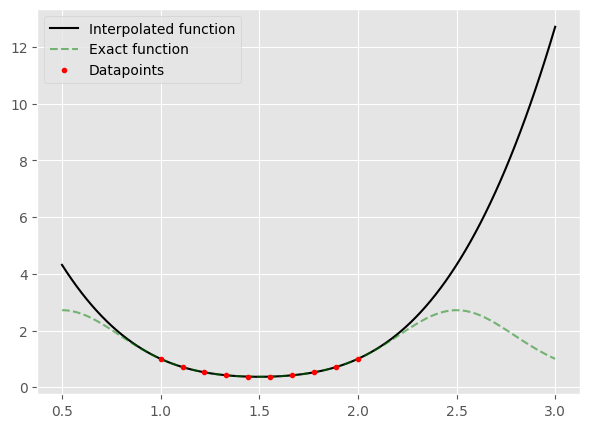

In [6]:
xx       = np.linspace(0.5, 3, 100)
yy_exact = func(xx)
yy_inter = curve(xx)

fig = plt.figure(figsize=(7, 5))

plt.plot(xx, yy_inter, 'k-', label="Interpolated function")
plt.plot(xx, yy_exact, 'g--', alpha=0.5, label="Exact function")
plt.plot(x, y, 'r.', label="Datapoints")

plt.legend()
plt.show()

Alternatively, the plot method can be used

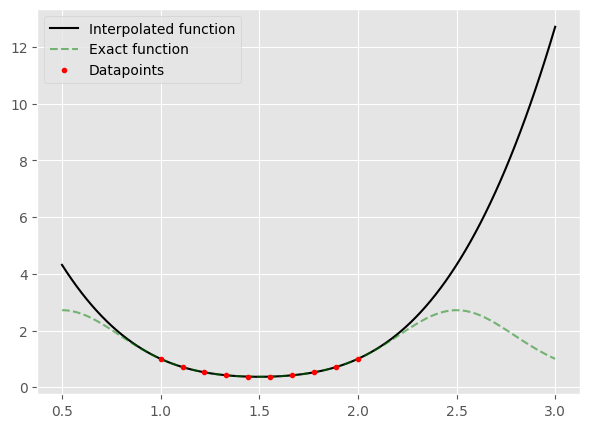

In [7]:
fig = plt.figure(figsize=(7, 5))

fig = curve.plot(100, (0.5, 3.), fig=fig, fmt='k-', label="Interpolated function")
plt.plot(xx, yy_exact, 'g--', alpha=0.5, label="Exact function")
plt.plot(x, y, 'r.', label="Datapoints")

plt.legend()
plt.show()

The curve object can also be used with noisy data. However, the cubic spline on it's own is would be prone to overfitting in such cases. Instead, a Gaussian filter can first be applied to the points and the spline fitted to the filtered values

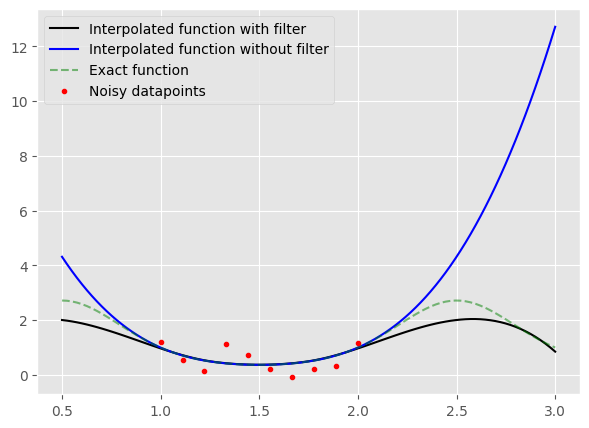

In [8]:
y_noisy = y + np.random.normal(0, 0.5, 10)

curve_filtered = GenericCurve(x, y, apply_gaussian_filter=True, gaussian_filter_sd=0.5)

fig = plt.figure(figsize=(7, 5))

fig = curve_filtered.plot(100, (0.5, 3.), fig=fig, fmt='k-', label="Interpolated function with filter")
fig = curve.plot(100, (0.5, 3.), fig=fig, fmt='b-', label="Interpolated function without filter")
plt.plot(xx, yy_exact, 'g--', alpha=0.5, label="Exact function")
plt.plot(x, y_noisy, 'r.', label="Noisy datapoints")

plt.legend()
plt.show()

The above case is of course idealized since the noise is truly normally distributed with a known standard deviation, but the general utility should be clear.